
# **Bayesian Methods:**




# Bayesian Linear Regression with BayesianRidge:

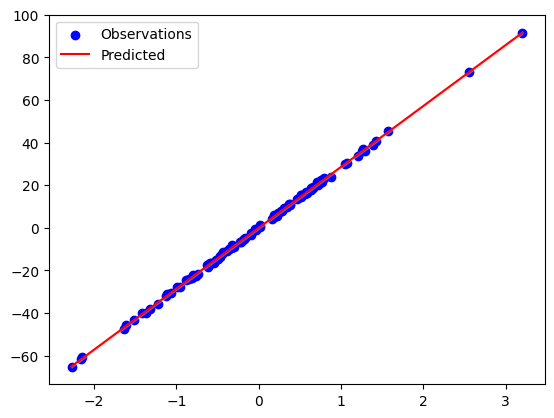

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data
X, Y = make_regression(n_samples=100, n_features=1, noise=0.5)

# Fit Bayesian Ridge regression model
reg = BayesianRidge()
reg.fit(X, Y)

# Predictions
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred, Y_std = reg.predict(X_test, return_std=True)

# Plot the results
plt.scatter(X, Y, color='blue', label='Observations')
plt.plot(X_test, Y_pred, color='red', label='Predicted')
plt.fill_between(X_test.squeeze(), Y_pred - Y_std, Y_pred + Y_std, color='pink', alpha=0.3)
plt.legend()
plt.show()


# Bayesian Gaussian Mixture Model with Scikit-learn:

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ee63203d3f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


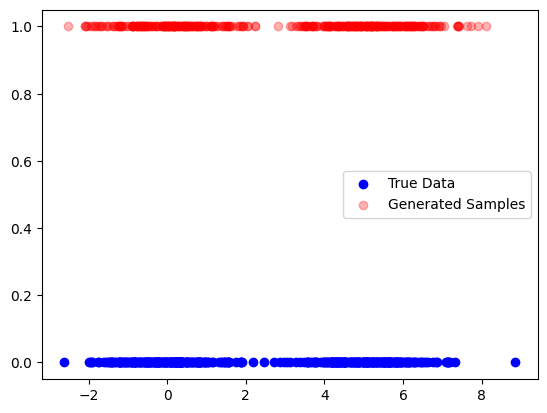

In [5]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.concatenate([np.random.normal(0, 1, 200), np.random.normal(5, 1, 200)]).reshape(-1, 1)

# Fit Bayesian Gaussian Mixture Model
bgmm = BayesianGaussianMixture(n_components=2, weight_concentration_prior=1e-3)
bgmm.fit(X)

# Generate samples from the fitted model
X_samples = bgmm.sample(400)[0]

# Plot the results
plt.scatter(X, np.zeros_like(X), color='blue', label='True Data')
plt.scatter(X_samples, np.ones_like(X_samples), color='red', alpha=0.3, label='Generated Samples')
plt.legend()
plt.show()


# Bayesian inference :

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.5 MB/s eta 0:00:00


100%|██████████| 1000/1000 [00:01<00:00, 587.98it/s]


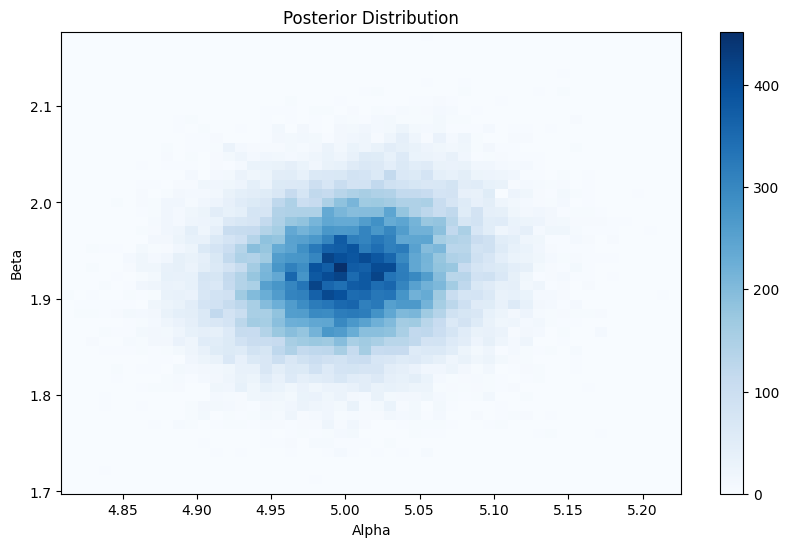

In [7]:
!pip install emcee

import numpy as np
import matplotlib.pyplot as plt
import emcee

# Generate synthetic data
np.random.seed(42)
true_alpha = 5
true_beta = 2
size = 100
X = np.random.normal(0, 1, size)
Y = true_alpha + true_beta * X + np.random.normal(0, 0.5, size)

# Define the log likelihood function
def log_likelihood(theta, x, y, y_err):
    alpha, beta = theta
    model = alpha + beta * x
    residuals = y - model
    return -0.5 * np.sum((residuals / y_err)**2)

# Define the log prior function
def log_prior(theta):
    alpha, beta = theta
    if -10 < alpha < 10 and -10 < beta < 10:
        return 0.0
    return -np.inf

# Define the log posterior function
def log_posterior(theta, x, y, y_err):
    return log_prior(theta) + log_likelihood(theta, x, y, y_err)

# Initialize the walkers
n_walkers = 100
n_dim = 2
initial_positions = np.random.randn(n_walkers, n_dim)

# Set up the MCMC sampler
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(X, Y, 0.5))

# Run the MCMC sampler
n_steps = 1000
sampler.run_mcmc(initial_positions, n_steps, progress=True)

# Extract samples from the posterior
samples = sampler.get_chain(discard=100, flat=True)

# Plot posterior distributions
plt.figure(figsize=(10, 6))
plt.hist2d(samples[:, 0], samples[:, 1], bins=50, cmap='Blues')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Posterior Distribution')
plt.colorbar()
plt.show()